# Calibration of AIRDOS CF

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import glob

In [7]:
fto = './TEMPCALIB/DATALOG.TXT' #  File to Open

l=[]
l.extend(range(0,259))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*')

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)


In [ ]:
df.reset_index(inplace=True)

plt.figure(figsize=(12,7))

plt.plot(df[5])
plt.xlabel('measurement No.')
plt.ylabel('Temperature')
plt.grid()

(50, 261)
(50, 261)
(50, 261)


Text(0, 0.5, '[-]')

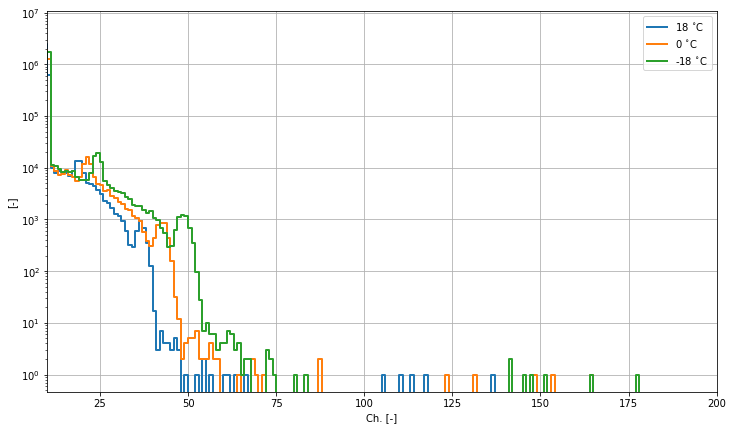

In [27]:
rc = df.loc[df.iloc[:,2]=='$CANDY']
rc.reset_index(drop=True, inplace=True)
rc = rc.apply(pd.to_numeric, errors='coerce')

ener = pd.Series('') 

LOW_ENERGY = 10

#temp = [18, 15, 10, 5, 0, -2, -5]
#temp = [23, 0, -23]
temp = [18, 0, -18]

for t in range(len(temp)):     
    ener[t] = rc.loc[rc[5]>temp[t]].loc[rc[5]<temp[t]+1][:50].sum()
    print(rc.loc[rc[5]>temp[t]].loc[rc[5]<temp[t]+1][:50].shape)

plt.figure(figsize=(12,7))
plt.yscale('log')
plt.xlim(10,200)

for t in range(len(temp)):     
    plt.plot(ener[t][3:], label=str(temp[t])+r' $^{\circ}$C', lw=2, drawstyle='steps-pre')
plt.grid()
plt.legend()
plt.xlabel('Ch. [-]')
plt.ylabel('[-]')

(50, 259)
(50, 259)
(50, 259)


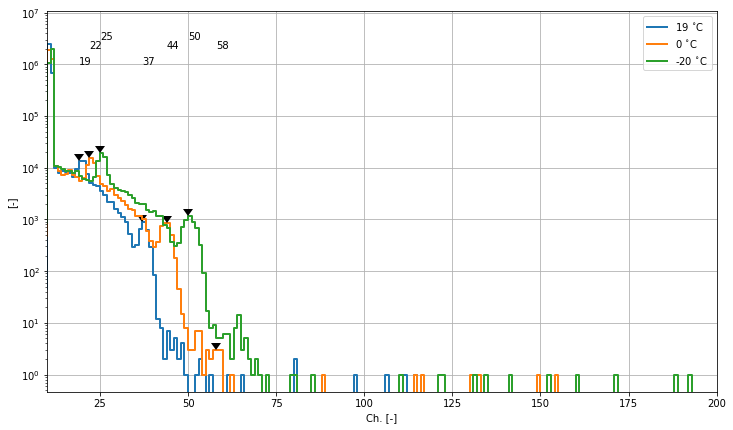

In [41]:
%matplotlib inline
#%matplotlib notebook
from scipy.signal import find_peaks

rc = df.loc[df.iloc[:,0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)
rc = rc.apply(pd.to_numeric, errors='coerce')

ener = pd.Series('') 
peaks = pd.Series('') 

LOW_ENERGY = 10

#temp = [18, 15, 10, 5, 0, -2, -5]
temp = [19, 0, -20]

for t in range(len(temp)):     
    ener[t] = rc.loc[rc[5]>temp[t]-0.5].loc[rc[5]<temp[t]+0.5][:50].sum()
    print(rc.loc[rc[5]>temp[t]-0.5].loc[rc[5]<temp[t]+0.5][:50].shape)
    peaks[t] = find_peaks(ener[t],width=2.1)

plt.figure(figsize=(12,7))
plt.yscale('log')
plt.xlim(10,200)

for t in range(len(temp)):     
    plt.plot(ener[t], label=str(temp[t])+r' $^{\circ}$C', lw=2, drawstyle='steps-post')
    plt.plot(peaks[t][0].tolist(),ener[t][peaks[t][0].tolist()], ls='', marker=7, ms=10, markeredgewidth=0, color='black')
    for i in range(4):     
        try:
            plt.text(peaks[t][0][i],1e6*(t+1),str(peaks[t][0][i]))
        except:
            pass
    
plt.grid()
plt.legend()
plt.xlabel('Ch. [-]')
plt.ylabel('[-]')

None